In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
import numpy as np
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
df = pd.read_csv('duration_survey_df.csv',encoding='utf-16')
df['Success'] = df['Success'].apply(lambda x : 'Success' if x == 1 else 'Fail')

In [3]:
df.groupby(['Success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,142.13095,104.624622,4.495504,70.846242,122.154167,181.096345,959.959000
Success,681.0,144.36205,93.946897,0.040000,81.041667,122.255467,181.933333,878.666667


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

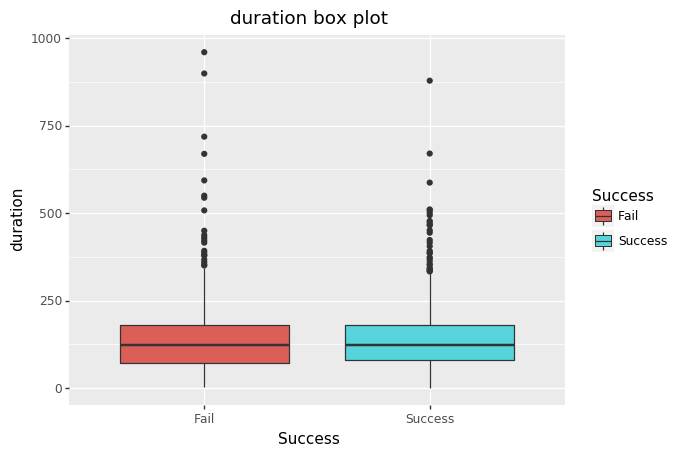

<ggplot: (281065890)>

In [4]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(df, aes(x='Success', y='duration')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('duration box plot')
video_duration.save('Video duration by success.pdf')
video_duration

In [5]:
df.groupby(['Success','super_category'])['duration'].describe()

count        mean         std        min  \
Success super_category                                                    
Fail    Arts                    42.0  163.845954  141.932087  11.833968   
        Comics & Illustartion   34.0  114.802874   69.066924  29.333333   
        Design & Tech          140.0  119.657368   86.209559   4.495504   
        Film                   100.0  179.938593  135.784286   5.960000   
        Food & Craft            95.0  132.264154   76.479608  13.000000   
        Games                  107.0  127.582217   80.034035  19.419400   
        Music                   35.0  136.863355  121.714474  23.516667   
        Publishing              81.0  167.576474  112.397591  15.648967   
Success Arts                    59.0  151.912586  104.155974   0.040000   
        Comics & Illustartion   89.0  129.633316   72.499356   3.918257   
        Design & Tech          136.0  127.942523   78.660327   0.040000   
        Film                    68.0  161.688104   85.228289  20.000000   
        Food & Craft            29.0  122.594658   56.471678  30.764067   
        Games                  150.0  133.417192  103.581172  25.720000   
        Music                   70.0  197.369410  118.905448   7.166667   
        Publishing              80.0  150.396142   88.118149  23.223200   

                                      25%         50%         75%         max  
Success super_category                                                         
Fail    Arts                    95.064527  128.264633  184.690756  899.160000  
        Comics & Illustartion   66.833283   87.020267  154.500333  279.012067  
        Design & Tech           53.071342   92.968708  170.220000  422.366667  
        Film                   100.677083  160.105400  234.880479  959.959000  
        Food & Craft            87.873850  124.266667  171.191854  334.200000  
        Games                   73.373317  108.174733  162.283333  593.720000  
        Music                   67.630000  111.311200  153.569667  669.627292  
        Publishing              91.364623  144.878067  224.366667  718.684633  
Success Arts                    88.862687  122.288833  189.579167  474.360000  
        Comics & Illustartion   81.000000  115.415300  170.503667  354.187167  
        Design & Tech           79.744875  116.288450  157.081925  587.416667  
        Film                   105.824392  145.787308  205.263392  444.291667  
        Food & Craft            72.947875  116.160000  161.953458  240.240000  
        Games                   75.581600  106.922324  167.475550  878.666667  
        Music                  120.640180  180.064933  246.158333  670.466667  
        Publishing              95.480000  126.326200  195.950000  501.200000

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

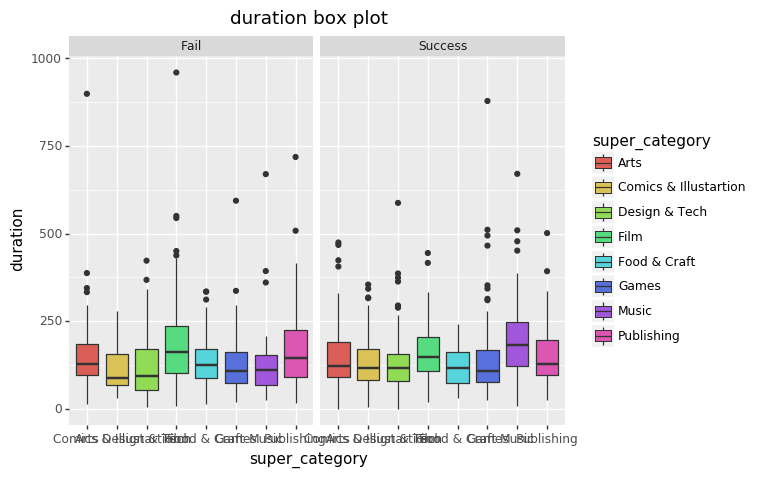

<ggplot: (-9223372036572645621)>

In [6]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~Success')
cat_duration.save('Category video duration by success.pdf')
cat_duration